In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

## Import hotel_bookings.csv

In [2]:
#import hotel_bookings.csv and view first 5 rows
hotel_bookings = pd.read_csv("../../Hotel Data/hotel_bookings.csv")
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
len(hotel_bookings)

119390

In [137]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,total_nights,total_guests,is_holiday_week
count,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000
mean,0.372589,104.505832,2016.157635,27.157028,15.799595,0.932096,2.512790,1.860009,0.104196,0.007962,0.029511,0.087631,0.137182,102.523809,3.444887,1.972167,0.282183
std,0.483496,106.915519,0.707714,13.589350,8.782227,0.995462,1.893258,0.575441,0.399119,0.097560,0.169235,0.847172,1.500699,50.005542,2.534960,0.719089,0.450064
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,1.000000,1.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,2.000000,2.000000,0.000000
50%,0.000000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,3.000000,2.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,4.000000,2.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,5400.000000,69.000000,55.000000,1.000000


## Create columns

### Create "arrival_date" column

In [135]:
hotel_bookings["arrival_date"] = hotel_bookings["arrival_date_day_of_month"].astype(str) + "-" + hotel_bookings["arrival_date_month"].astype(str) + "-" + hotel_bookings["arrival_date_year"].astype(str)
hotel_bookings["arrival_date"] = pd.to_datetime(hotel_bookings["arrival_date"])

In [136]:
# Finding out date range
print(np.min(hotel_bookings["arrival_date"]))
print(np.max(hotel_bookings["arrival_date"]))

2015-07-01 00:00:00
2017-08-31 00:00:00


### Create "total_nights" column

In [7]:
hotel_bookings["total_nights"] = hotel_bookings["stays_in_weekend_nights"] + hotel_bookings["stays_in_week_nights"]

### Create "total_guests" column

In [8]:
#children is a float rather than integer. Remove nulls and convert to integer
hotel_bookings['children'] = hotel_bookings['children'].fillna(0)
hotel_bookings["children"] = hotel_bookings["children"].astype(int)
hotel_bookings["total_guests"] = hotel_bookings["adults"] + hotel_bookings["children"] + hotel_bookings["babies"]

### Create "guest_type" column based on custom function

#### Custom function to define guest type i.e. large group, family, couple, individual traveller etc

In [9]:
def guest_type(hotel_bookings):
    total_guests = hotel_bookings['total_guests']
    adults = hotel_bookings['adults']
    if total_guests > 6:
        return("Large Group")
    elif total_guests == 1:
        return("Individual Traveller")
    elif total_guests == 0:
        return("Unknown")
    else:
        if adults != total_guests:
            return("Family")
        else:
            if total_guests == 2:
                return("Couple")
            else: 
                return("Group")

#### Apply custom function to DataFrame and print first 5 rows

In [10]:
hotel_bookings["guest_type"] = hotel_bookings.apply(guest_type, axis=1)
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_nights,total_guests,guest_type
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2,Couple
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2,Couple
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1,Individual Traveller
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1,Individual Traveller
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2,Couple


In [11]:
# checking function is working
guests_per_visit = hotel_bookings.loc[:, ['adults', 'children', 'babies', 'total_guests', 'guest_type']]
guests_per_visit.head(15)

,adults,children,babies,total_guests,guest_type
0,2,0,0,2,Couple
1,2,0,0,2,Couple
2,1,0,0,1,Individual Traveller
3,1,0,0,1,Individual Traveller
4,2,0,0,2,Couple
5,2,0,0,2,Couple
6,2,0,0,2,Couple
7,2,0,0,2,Couple
8,2,0,0,2,Couple
9,2,0,0,2,Couple


## Import data from API

In [12]:
# API call??? for 2015, 2016 & 2017 - mention hotel_bookings date ranges
requests.get('https://date.nager.at/api/v3/publicholidays/2015/PT')
requests.get('https://date.nager.at/api/v3/publicholidays/2016/PT')
requests.get('https://date.nager.at/api/v3/publicholidays/2017/PT')

<Response [200]>

In [13]:
# Create pandas DataFrame for each year
holidays_portugal_2015 = requests.get('https://date.nager.at/api/v3/publicholidays/2015/PT')
holidays_portugal_2016 = requests.get('https://date.nager.at/api/v3/publicholidays/2016/PT')
holidays_portugal_2017 = requests.get('https://date.nager.at/api/v3/publicholidays/2017/PT')
holidays_portugal_2015 = pd.DataFrame(holidays_portugal_2015.json())
holidays_portugal_2016 = pd.DataFrame(holidays_portugal_2016.json())
holidays_portugal_2017 = pd.DataFrame(holidays_portugal_2017.json())

In [25]:
# Concatenate 2015, 2016, 2017 holiday data
holidays_portugal = pd.concat([holidays_portugal_2015, holidays_portugal_2016, holidays_portugal_2017], ignore_index = True)
holidays_portugal.head()

,date,localName,name,countryCode,fixed,global,counties,launchYear,types
0,2015-01-01,Ano Novo,New Year's Day,PT,True,True,None,None,[Public]
1,2015-02-17,Carnaval,Carnival,PT,False,True,None,None,[Optional]
2,2015-04-03,Sexta-feira Santa,Good Friday,PT,False,True,None,None,[Public]
3,2015-04-05,Domingo de Páscoa,Easter Sunday,PT,False,True,None,None,[Public]
4,2015-04-25,Dia da Liberdade,Freedom Day,PT,True,True,None,None,[Public]


In [26]:
len(holidays_portugal)

51

### Get holidays_portugal in the format I want - add/drop/rename columns, convert to correct data type etc

In [27]:
# Dropping columns from holidays_portugal
holidays_portugal = holidays_portugal.drop(['localName', 'countryCode', 'fixed', 'global', 'counties', 'launchYear', 'types'], axis = 1)

In [28]:
# Renaming date and name to holiday_date, holiday_name using dictionary
holidays_portugal.rename(columns = {'date':'holiday_date', 'name':'holiday_name'}, inplace = True)
holidays_portugal.head()

,holiday_date,holiday_name
0,2015-01-01,New Year's Day
1,2015-02-17,Carnival
2,2015-04-03,Good Friday
3,2015-04-05,Easter Sunday
4,2015-04-25,Freedom Day


In [29]:
holidays_portugal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   holiday_date  51 non-null     object
 1   holiday_name  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [30]:
# Make holiday_date type date 
holidays_portugal["holiday_date"] = pd.to_datetime(holidays_portugal["holiday_date"])
holidays_portugal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   holiday_date  51 non-null     datetime64[ns]
 1   holiday_name  51 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 944.0+ bytes


In [31]:
len(holidays_portugal)

51

In [41]:
# Add 2 columns: holiday_week_number, holiday_year
# Want to join on week/year
holidays_portugal["holiday_week_number"] = holidays_portugal["holiday_date"].dt.isocalendar().week
holidays_portugal["holiday_year"] = holidays_portugal["holiday_date"].dt.isocalendar().year
holidays_portugal

,holiday_date,holiday_name,holiday_week_number,holiday_year
0,2015-01-01,New Year's Day,1,2015
1,2015-02-17,Carnival,8,2015
2,2015-04-03,Good Friday,14,2015
3,2015-04-05,Easter Sunday,14,2015
4,2015-04-25,Freedom Day,17,2015
5,2015-05-01,Labour Day,18,2015
6,2015-06-01,Azores Day,23,2015
7,2015-06-04,Corpus Christi,23,2015
8,2015-06-10,National Day,24,2015
9,2015-07-01,Madeira Day,27,2015


In [43]:
# Drop some rows where there are 2 holidays in one week
# Unique holiday weeks
# Manually went through which weeks had 2 holidays and removed second. 
holidays_to_drop = holidays_portugal.query('(holiday_date == "2015-04-05") | (holiday_date == "2015-06-04") | (holiday_date == "2015-12-26") | (holiday_date == "2016-03-27") | (holiday_date == "2016-05-01") | (holiday_date == "2017-01-01") | (holiday_date == "2017-04-16") | (holiday_date == "2017-12-26")')
holidays_to_drop

,holiday_date,holiday_name,holiday_week_number,holiday_year
3,2015-04-05,Easter Sunday,14,2015
7,2015-06-04,Corpus Christi,23,2015
16,2015-12-26,St. Stephen's Day,52,2015
20,2016-03-27,Easter Sunday,12,2016
22,2016-05-01,Labour Day,17,2016
34,2017-01-01,New Year's Day,52,2016
37,2017-04-16,Easter Sunday,15,2017
50,2017-12-26,St. Stephen's Day,52,2017


In [47]:
holidays_portugal_unique = holidays_portugal.drop(holidays_to_drop.index)
holidays_portugal_unique.reset_index(drop=True)

,holiday_date,holiday_name,holiday_week_number,holiday_year
0,2015-01-01,New Year's Day,1,2015
1,2015-02-17,Carnival,8,2015
2,2015-04-03,Good Friday,14,2015
3,2015-04-25,Freedom Day,17,2015
4,2015-05-01,Labour Day,18,2015
5,2015-06-01,Azores Day,23,2015
6,2015-06-10,National Day,24,2015
7,2015-07-01,Madeira Day,27,2015
8,2015-08-15,Assumption Day,33,2015
9,2015-10-05,Republic Day,41,2015


## Merge the data

In [34]:
# Old merge on arrival_date
# Merge portugal_holidays dataframe with hotel_bookings dataframe using left join
# hotel_bookings = hotel_bookings.merge(holidays_portugal, how = "left", left_on='arrival_date', right_on='holiday_date')

In [48]:
len(hotel_bookings)

119390

In [49]:
# Merge portugal_holidays dataframe with hotel_bookings dataframe using left join
# Merge on ["holiday_week_number", "holiday_year"] rather than "holiday_date". This will be more useful later on. Typically checkins would not be on a holiday date itself but before the date
hotel_bookings = hotel_bookings.merge(holidays_portugal_unique, how = "left", left_on=["arrival_date_year", "arrival_date_week_number"], right_on=["holiday_year", "holiday_week_number"])
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,arrival_date,total_nights,total_guests,guest_type,holiday_date,holiday_name,holiday_week_number,holiday_year
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Check-Out,2015-07-01,2015-07-01,0,2,Couple,2015-07-01,Madeira Day,27,2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Check-Out,2015-07-01,2015-07-01,0,2,Couple,2015-07-01,Madeira Day,27,2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Check-Out,2015-07-02,2015-07-01,1,1,Individual Traveller,2015-07-01,Madeira Day,27,2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Check-Out,2015-07-02,2015-07-01,1,1,Individual Traveller,2015-07-01,Madeira Day,27,2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Check-Out,2015-07-03,2015-07-01,2,2,Couple,2015-07-01,Madeira Day,27,2015


In [50]:
len(hotel_bookings)

119390

### Create "is_holiday week" column using new data from merge

In [51]:
# Create is_holiday column / replace nulls / use apply 
hotel_bookings[["holiday_name"]] = hotel_bookings[["holiday_name"]].fillna("No holiday")
hotel_bookings["is_holiday_week"] = hotel_bookings.apply(lambda x: '0' if x['holiday_name'] == "No holiday" else 1, axis=1)
hotel_bookings['is_holiday_week'] = hotel_bookings['is_holiday_week'].astype(int)

## Cleaning the data

### Dropping columns not relevant to my analysis

In [53]:
hotel_bookings = hotel_bookings.drop(['meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'holiday_week_number', 'holiday_year'], axis=1)

### Replacing nulls

In [54]:
hotel_bookings.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
country                             488
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
deposit_type                          0
adr                                   0
reservation_status                    0
reservation_status_date               0
arrival_date                          0
total_nights                          0
total_guests                          0
guest_type                            0
holiday_date                      85693


### Replacing nulls

In [55]:
# Replacing NAs with "Unknown" or zeroes depending on the data type
# hotel_bookings['children'] = hotel_bookings['children'].fillna(0)
hotel_bookings["country"] = hotel_bookings["country"].fillna("Unknown")
# hotel_bookings[["agent", "company"]] = hotel_bookings[["agent", "company"]].fillna("Not Applicable")
hotel_bookings[["holiday_date"]] = hotel_bookings[["holiday_date"]].fillna("")
# hotel_bookings[["holiday_name"]] = hotel_bookings[["holiday_name"]].fillna("No holiday")
# hotel_bookings[["holiday_week_number"]] = hotel_bookings[["holiday_week_number"]].fillna(0)
# hotel_bookings[["holiday_year"]] = hotel_bookings[["holiday_year"]].fillna(0)
hotel_bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
country                           0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
deposit_type                      0
adr                               0
reservation_status                0
reservation_status_date           0
arrival_date                      0
total_nights                      0
total_guests                      0
guest_type                        0
holiday_date                      0
holiday_name                      0
is_holiday_week                   0
dtype: int64

In [56]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,reservation_status,reservation_status_date,arrival_date,total_nights,total_guests,guest_type,holiday_date,holiday_name,is_holiday_week
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,Check-Out,2015-07-01,2015-07-01,0,2,Couple,2015-07-01 00:00:00,Madeira Day,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,Check-Out,2015-07-01,2015-07-01,0,2,Couple,2015-07-01 00:00:00,Madeira Day,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,Check-Out,2015-07-02,2015-07-01,1,1,Individual Traveller,2015-07-01 00:00:00,Madeira Day,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,Check-Out,2015-07-02,2015-07-01,1,1,Individual Traveller,2015-07-01 00:00:00,Madeira Day,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,Check-Out,2015-07-03,2015-07-01,2,2,Couple,2015-07-01 00:00:00,Madeira Day,1


In [57]:
# Change incorrect data types
hotel_bookings["reservation_status_date"] = pd.to_datetime(hotel_bookings["reservation_status_date"])
hotel_bookings["holiday_date"] = pd.to_datetime(hotel_bookings["holiday_date"])

In [59]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  int64  

# Some analysis / more dropping cols

In [61]:
hotel_bookings["total_nights"].describe()

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: total_nights, dtype: float64

In [39]:
#Some entries where total nights = 0. look at dropping total_nights=0

In [62]:
hotel_bookings.groupby("total_nights", sort=True)["arrival_date"].count()

total_nights
0       715
1     21020
2     27643
3     27076
4     17383
5      7784
6      3857
7      8655
8      1161
9       841
10     1139
11      396
12      223
13      142
14      916
15       75
16       40
17       20
18       35
19       22
20       14
21       71
22       14
23        8
24        6
25       37
26        6
27        5
28       35
29       14
30       13
33        3
34        1
35        5
38        1
42        4
43        1
45        1
46        1
48        1
49        1
56        2
57        1
60        1
69        1
Name: arrival_date, dtype: int64

In [88]:
hotel_bookings.groupby("total_guests", sort=True)["arrival_date"].count()

total_guests
0       196
1     23431
2     85500
3     11000
4      4105
5       144
6         1
10        2
12        2
20        2
26        5
27        2
40        1
50        1
55        1
Name: arrival_date, dtype: int64

In [64]:
#dropping rows where total_nights or total_guests = 0
rows_to_drop = hotel_bookings.query('(total_nights == 0) | (total_guests == 0)')

In [65]:
len(rows_to_drop)

825

In [66]:
hotel_bookings = hotel_bookings.drop(rows_to_drop.index)

In [67]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,total_nights,total_guests,is_holiday_week
count,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000
mean,0.372589,104.505832,2016.157635,27.157028,15.799595,0.932096,2.512790,1.860009,0.104196,0.007962,0.029511,0.087631,0.137182,102.523809,3.444887,1.972167,0.282183
std,0.483496,106.915519,0.707714,13.589350,8.782227,0.995462,1.893258,0.575441,0.399119,0.097560,0.169235,0.847172,1.500699,50.005542,2.534960,0.719089,0.450064
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,1.000000,1.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,2.000000,2.000000,0.000000
50%,0.000000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,3.000000,2.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,4.000000,2.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,5400.000000,69.000000,55.000000,1.000000


In [69]:
arrivals = hotel_bookings.groupby("arrival_date", sort=True)["total_nights"].count()

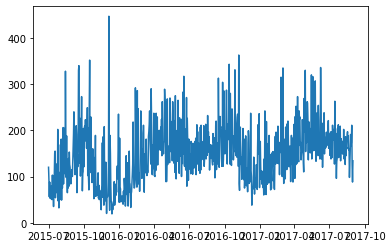

In [71]:
plt.plot(arrivals)


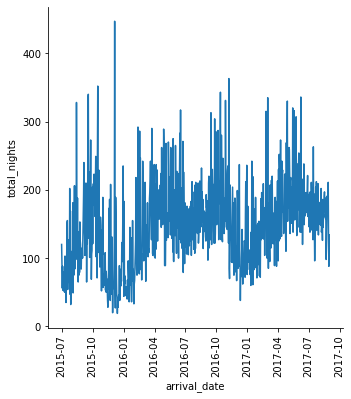

In [83]:
# There are potentially trends here but the data is too granular. This is why I analyse by week later on
sns.relplot(data = arrivals, kind = "line")
plt.xticks(rotation=90)
plt.show()

## Exploring the data

### Analysis on cancelations - more analysis to add

In [87]:
hotel_bookings['is_canceled'].value_counts()

0    74389
1    44176
Name: is_canceled, dtype: int64

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

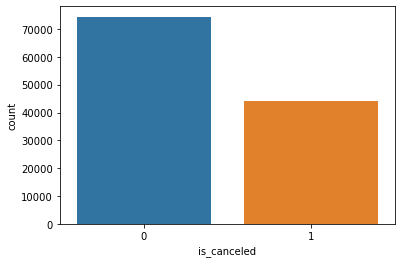

In [88]:
# Plot of bookings not canceled (0) vs canceled (1) 
sns.countplot(data = hotel_bookings, x = 'is_canceled')

<AxesSubplot:xlabel='hotel', ylabel='count'>

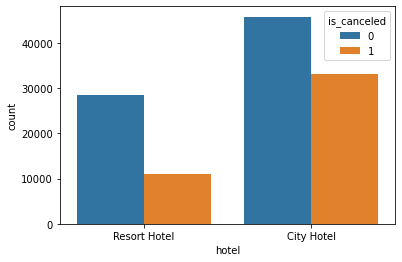

In [91]:
# Plot of bookings not canceled (0) vs canceled (1) by hotel type
sns.countplot(data = hotel_bookings, x = 'hotel', hue = 'is_canceled')

### Analysis by Country

In [139]:
arrivals_per_country = hotel_bookings.groupby("country")["arrival_date"].count().sort_values(ascending = False)
arrivals_per_country_10 = pd.DataFrame(arrivals_per_country[0:10])
arrivals_per_country_10

,arrival_date
country,
PRT,47943
GBR,12095
FRA,10389
ESP,8544
DEU,7285
ITA,3756
IRL,3373
BEL,2338
BRA,2217


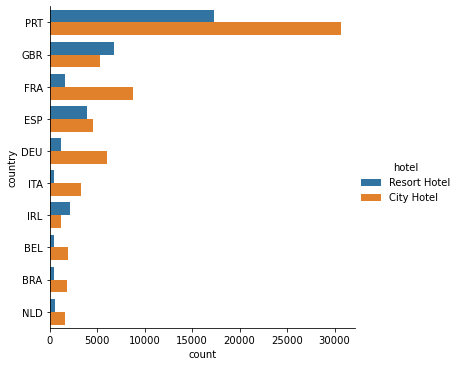

In [134]:
top_10_countries = hotel_bookings[hotel_bookings["country"].isin(arrivals_per_country_10.index)]
sns.catplot(data=top_10_countries, y="country", kind = "count", hue="hotel", order = top_10_countries['country'].value_counts().index)

### Analysis per month / Analysis per week

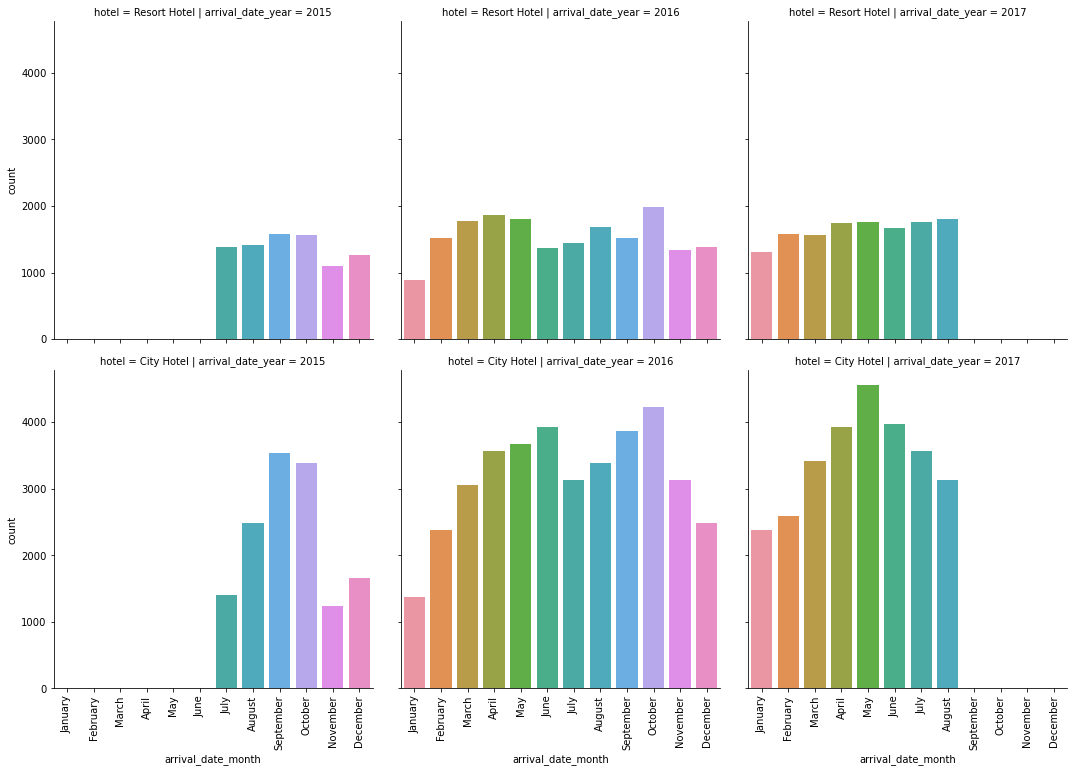

In [163]:
# Creating a list to ensure months appear in the correct order in following graph
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Using catplot() to view number of check-ins per month/year brokwn out by hotel type (resort vs city)
g=sns.catplot(data = hotel_bookings, x="arrival_date_month", kind = "count", order = month_order, row = "hotel", col = "arrival_date_year")
g.set_xticklabels(rotation=90)
plt.show()

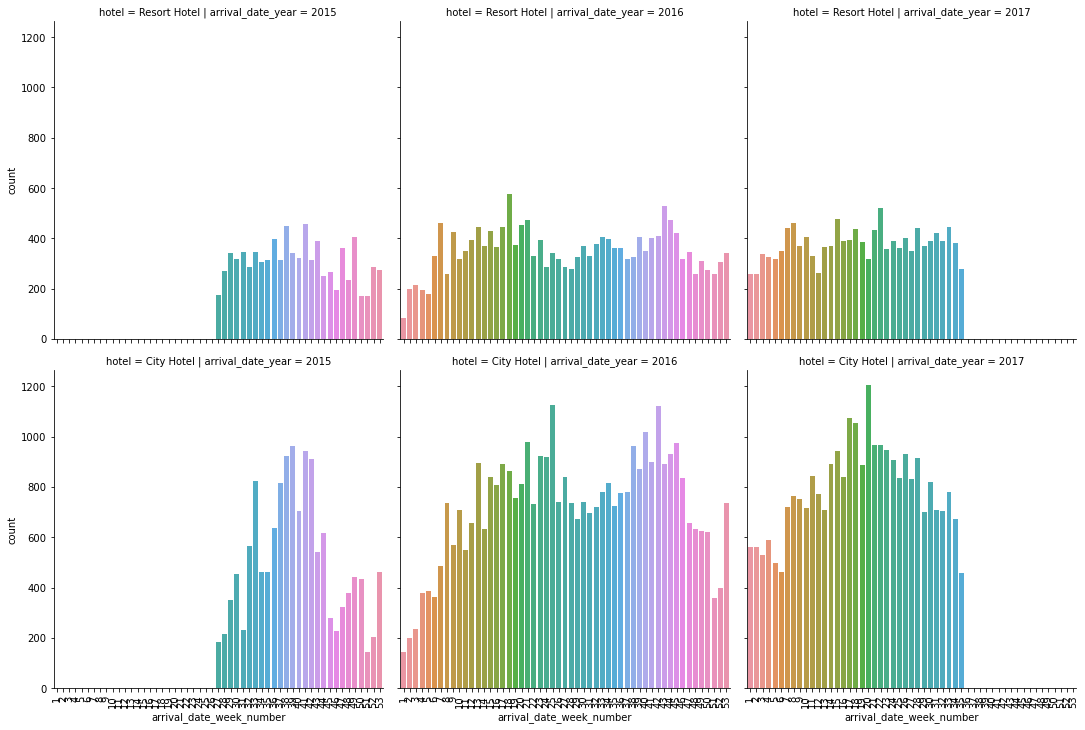

In [122]:
# The above catplot() is interesting but I want a more granular view so breaking out by week number/year
g=sns.catplot(data = hotel_bookings, x="arrival_date_week_number", kind = "count", row = "hotel", col = "arrival_date_year")
g.set_xticklabels(rotation=90)
plt.show()

In [140]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,reservation_status,reservation_status_date,arrival_date,total_nights,total_guests,guest_type,holiday_date,holiday_name,is_holiday_week
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,Check-Out,2015-07-02,2015-07-01,1,1,Individual Traveller,2015-07-01,Madeira Day,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,Check-Out,2015-07-02,2015-07-01,1,1,Individual Traveller,2015-07-01,Madeira Day,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,Check-Out,2015-07-03,2015-07-01,2,2,Couple,2015-07-01,Madeira Day,1
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,Check-Out,2015-07-03,2015-07-01,2,2,Couple,2015-07-01,Madeira Day,1
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,107.0,Check-Out,2015-07-03,2015-07-01,2,2,Couple,2015-07-01,Madeira Day,1


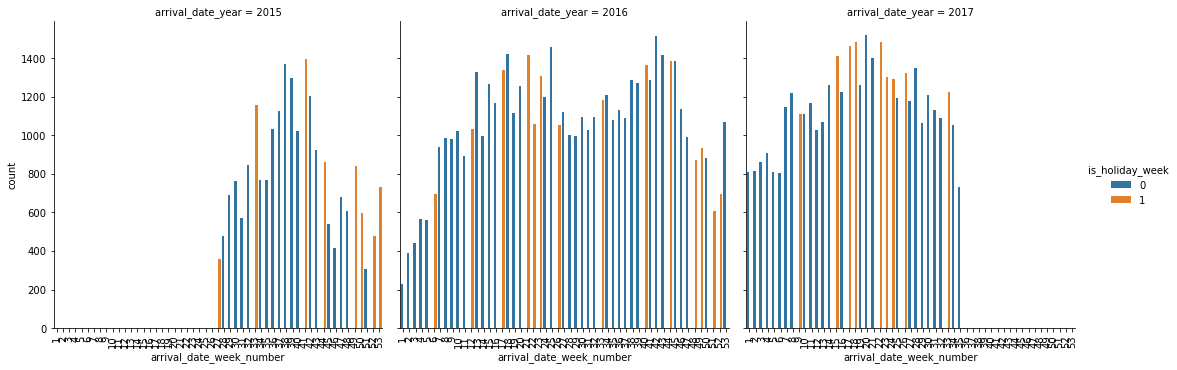

In [145]:
# Adding hue = is_holiday_week. Not as clear as I was hoping for but definitely some spikes relating to holiday weeks
g=sns.catplot(data = hotel_bookings, x="arrival_date_week_number", kind = "count", hue = "is_holiday_week", col = "arrival_date_year")
g.set_xticklabels(rotation=90)
plt.show()

### Create "cancelation_period" column

In [203]:
# Create "cancelation_period" columns based off reservation status and taking the difference between that date and arrival date
# Does this make sense??
cancelations = hotel_bookings.loc[:,["reservation_status", "reservation_status_date", "arrival_date"]]
cancelations = cancelations[cancelations["reservation_status"]=="Canceled"]
cancelations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43017 entries, 8 to 111924
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   reservation_status       43017 non-null  object        
 1   reservation_status_date  43017 non-null  object        
 2   arrival_date             43017 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.3+ MB


In [204]:
cancelations["reservation_status_date"] = pd.to_datetime(hotel_bookings["reservation_status_date"])
cancelations["cancelation_period"] = cancelations["arrival_date"] - cancelations["reservation_status_date"]
cancelations.head()

,reservation_status,reservation_status_date,arrival_date,cancelation_period
8,Canceled,2015-05-06,2015-07-01,56 days
9,Canceled,2015-04-22,2015-07-01,70 days
10,Canceled,2015-06-23,2015-07-01,8 days
27,Canceled,2015-05-11,2015-07-01,51 days
32,Canceled,2015-05-29,2015-07-01,33 days


In [49]:
### Might look at classifying the cancelation period i.e. 48 hours in advance, no show, 1 week, longer etc

In [ ]:
# Trying to look at weeks with holidays... WIP

In [301]:
# Group by year week number for is holiday
hotel_bookings_merge.groupby(["arrival_date_year", "arrival_date_week_number"])["is_holiday"].max()

arrival_date_year  arrival_date_week_number
2015               27                          1.0
                   28                          0.0
                   29                          0.0
                   30                          0.0
                   31                          0.0
                                              ... 
2017               31                          0.0
                   32                          0.0
                   33                          1.0
                   34                          0.0
                   35                          0.0
Name: is_holiday, Length: 115, dtype: float64

<AxesSubplot:xlabel='count', ylabel='party_type'>

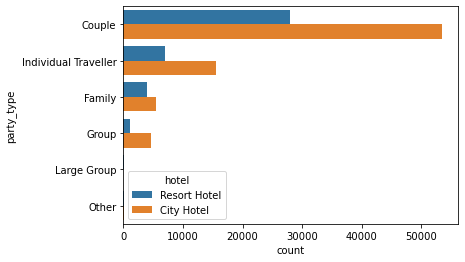

In [153]:
sns.countplot(data = hotel_bookings, y = 'party_type', hue = 'hotel')

<AxesSubplot:xlabel='count', ylabel='party_type'>

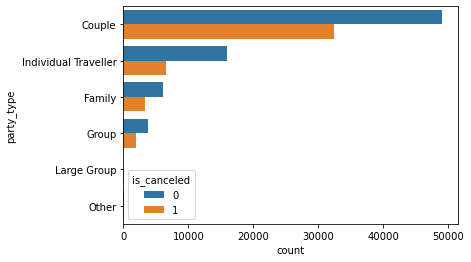

In [154]:
sns.countplot(data = hotel_bookings, y = 'party_type', hue = 'is_canceled')

#### Cancelations

In [ ]:
# Do some analysis on repeated_guest, previous_cancelations, deposit type etc etc

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

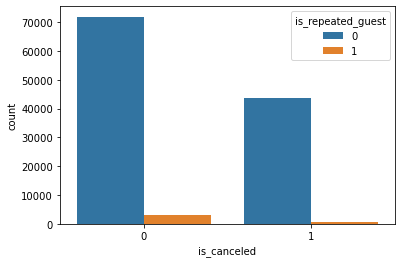

In [173]:
sns.countplot(data = hotel_bookings, x = 'is_canceled', hue = 'is_repeated_guest')

#### Group by / sort / index etc

In [160]:
# Group by - how far in advance various party types book
hotel_bookings.groupby("party_type", sort=True)["lead_time"].mean().sort_values(ascending = False)

party_type
Large Group             282.062500
Couple                  116.844899
Group                    94.608939
Family                   88.557319
Individual Traveller     66.815509
Unknown                  39.233333
Name: lead_time, dtype: float64

In [157]:
# Group by - total nights stayed per party type
hotel_bookings.groupby("party_type")["total_nights"].mean().sort_values(ascending = False)

party_type
Large Group             5.687500
Unknown                 4.522222
Family                  3.933512
Group                   3.710021
Couple                  3.555260
Individual Traveller    2.677207
Name: total_nights, dtype: float64

In [71]:
#### Want to look at week numbers - e.g. christmas / midterm etc YoY

In [4]:
#### Drop columns because there are too many - done